# Empirical Analysis of Fibonacci Algorithms

## Metrics:
- **Execution Time**: Measured using the `timeit` module for precise and reliable timing.
- **Memory Usage**: Measured using `tracemalloc`.
- **Coefficient of Variability (CV)**: Measures runtime variability.


In [33]:
import math
import timeit
import tracemalloc
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean, stdev
import pandas as pd
import sys

## Performance Measurement Functions
These functions will track execution time, memory usage, and compute coefficient of variability.

In [2]:
# Measure execution time
def measure_time(func, n, repetitions=5):
    times = timeit.repeat(lambda: func(n), repeat=repetitions, number=1)
    avg_time = sum(times) / repetitions
    std_time = (sum((t - avg_time) ** 2 for t in times) / repetitions) ** 0.5
    return avg_time, std_time

In [3]:
# Measure memory usage
def measure_memory(func, n):
    tracemalloc.start()
    func(n)
    _, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    return peak

In [4]:
# Compute Coefficient of Variability (CV)
def compute_cv(mean, std):
    return std / mean if mean != 0 else float('inf')

## Input Data
We define a range of input sizes to test our algorithms.

In [5]:
# Define input sizes for testing
input_sizes_recur = [5, 7, 10, 12, 15, 17, 20, 22, 25, 27, 30, 32, 35, 37, 40]
input_sizes = [10, 50, 100, 250, 500, 650, 800, 1000, 1250, 1500, 2000, 2500, 3000, 4000, 5000, 7500, 10000]

## Experiment Function

In [7]:
def run_experiment(func, input_sizes, repetitions=5):
    results = {size: {'time': None, 'memory': None, 'cv': None} for size in input_sizes}

    # Header for aligned columns
    print(f'{"Input Size":>10} | {"Time (s)":>12} | {"Memory (bytes)":>15} | {"CV":>8}')
    print('-' * 52)

    for n in tqdm(input_sizes, desc="Running experiments"):
        try:
            avg_time, std_time = measure_time(func, n, repetitions=repetitions)
            memory_used = measure_memory(func, n)
            cv_value = compute_cv(avg_time, std_time)
            results[n]['time'] = avg_time
            results[n]['memory'] = memory_used
            results[n]['cv'] = cv_value

            # Aligned columns for output
            print(f'{n:10d} | {avg_time:12.6f} | {memory_used:15,} | {cv_value:8.4f}')
        except Exception as e:
            print(f"Error at input size {n}: {e}")
    return results

## Visualization Function

In [8]:
def plot_results(results, algorithm_name):
    # Prepare the data
    sizes = list(results.keys())
    times = [results[n]['time'] for n in sizes]
    memories = [results[n]['memory'] for n in sizes]
    cvs = [results[n]['cv'] for n in sizes]

    # Create a DataFrame for Seaborn
    data = pd.DataFrame({
        'Input Size': sizes,
        'Execution Time (s)': times,
        'Memory Usage (bytes)': memories,
        'Coefficient of Variation (CV)': cvs
    })

    # Set Seaborn style
    sns.set(style="whitegrid", palette="muted", font_scale=1.1)

    # Create subplots with a smaller size
    fig, axes = plt.subplots(3, 1, figsize=(10, 12))  # Adjusted size for Jupyter

    # Plot Execution Time
    sns.lineplot(data=data, x='Input Size', y='Execution Time (s)', marker='o', ax=axes[0])
    axes[0].set_title(f'{algorithm_name}: Execution Time vs Input Size', fontsize=12)
    axes[0].set_xlabel('Input Size (n)')
    axes[0].set_ylabel('Execution Time (s)')

    # Plot Memory Usage
    sns.lineplot(data=data, x='Input Size', y='Memory Usage (bytes)', marker='x', color='r', ax=axes[1])
    axes[1].set_title(f'{algorithm_name}: Memory Usage vs Input Size', fontsize=12)
    axes[1].set_xlabel('Input Size (n)')
    axes[1].set_ylabel('Memory Usage (bytes)')

    # Plot Coefficient of Variation (CV)
    sns.lineplot(data=data, x='Input Size', y='Coefficient of Variation (CV)', marker='s', color='g', ax=axes[2])
    axes[2].set_title(f'{algorithm_name}: Coefficient of Variation vs Input Size', fontsize=12)
    axes[2].set_xlabel('Input Size (n)')
    axes[2].set_ylabel('CV')

    # Adjust layout to prevent overlap
    plt.tight_layout(pad=2.0)
    plt.show()

In [9]:
def analyze_algorithm(func, algorithm_name, input_sizes, repetitions=5):
    print(f'\nAnalyzing {algorithm_name}...')
    results = run_experiment(func, input_sizes, repetitions)
    plot_results(results, algorithm_name)

Algorithm 1: Top-down Dynamic Programming - Naive Recursion

In [10]:
def fib1_recur(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        return fib1_recur(n - 1) + fib1_recur(n - 2)
    
def fib1(n):
    return fib1_recur(n)


Analyzing Naive Recursion (fib1)...
Input Size |     Time (s) |  Memory (bytes) |       CV
----------------------------------------------------


Running experiments:   0%|          | 0/15 [00:00<?, ?it/s]

Running experiments:  53%|█████▎    | 8/15 [00:00<00:00, 77.16it/s]

         5 |     0.000010 |               0 |   0.8886
         7 |     0.000011 |               0 |   0.1177
        10 |     0.000043 |               0 |   0.0264
        12 |     0.000100 |               0 |   0.0585
        15 |     0.000441 |              64 |   0.0461
        17 |     0.001272 |              96 |   0.1075
        20 |     0.006694 |             160 |   0.5742
        22 |     0.009047 |             192 |   0.2932
        25 |     0.038194 |         147,896 |   0.2003
        27 |     0.162315 |             256 |   0.3242
        30 |     0.460055 |             320 |   0.0528
        32 |     1.147486 |           2,380 |   0.1572


Running experiments:  87%|████████▋ | 13/15 [00:36<00:06,  3.48s/it]

        35 |     4.352832 |         148,584 |   0.0694


Running experiments:  93%|█████████▎| 14/15 [02:19<00:15, 15.21s/it]

        37 |    15.062104 |         150,756 |   0.1677


Running experiments: 100%|██████████| 15/15 [09:34<00:00, 38.33s/it]

        40 |    72.579336 |         150,580 |   0.1529


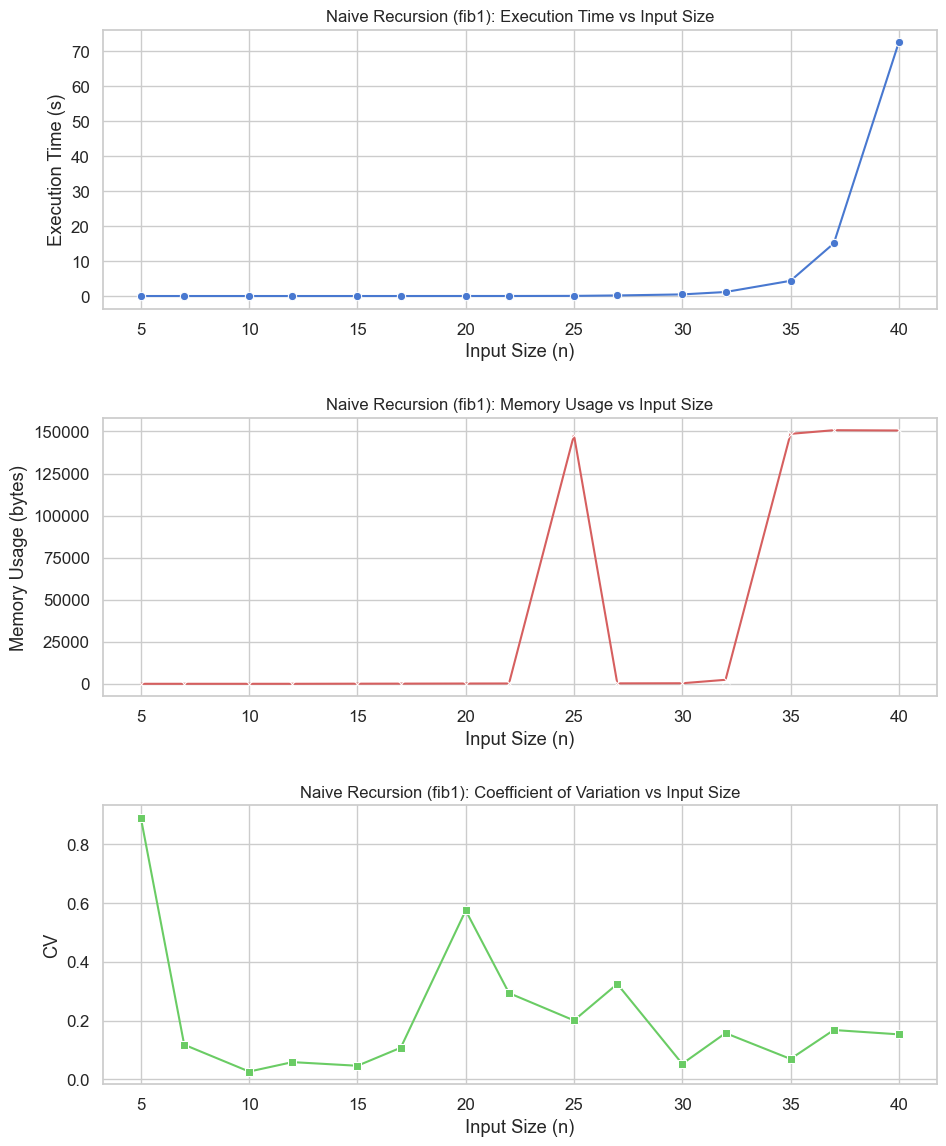

In [11]:
analyze_algorithm(fib1, 'Naive Recursion (fib1)', input_sizes_recur)

Algorithm 2: Top-down Dynamic Programming with Memoization - Memoized Recursive

In [34]:
sys.setrecursionlimit(10**6)

def fib2_recur(n, F):
    if F[n] == None:
        if n == 0:
            F[n] = 0
        elif n == 1:
            F[n] = 1
        else:
            F[n] = fib2_recur(n - 1, F) + fib2_recur(n - 2, F)
    return F[n]

def fib2(n):
    F = [None] * (n +1)
    return fib2_recur(n, F)


Analyzing Memoized Recursion (fib2)...
Input Size |     Time (s) |  Memory (bytes) |       CV
----------------------------------------------------


Running experiments:   0%|          | 0/17 [00:00<?, ?it/s]

Running experiments:  41%|████      | 7/17 [00:00<00:00, 59.56it/s]

        10 |     0.000026 |              96 |   0.2502
        50 |     0.000097 |           1,612 |   0.0998
       100 |     0.000279 |           3,856 |   0.1398
       250 |     0.000674 |          11,956 |   0.0619
       500 |     0.001037 |          30,088 |   0.1899
       650 |     0.001897 |          44,219 |   0.1910
       800 |     0.002062 |          59,476 |   0.2297
      1000 |     0.002668 |         231,353 |   0.2108
      1250 |     0.003537 |         267,131 |   0.1623
      1500 |     0.002900 |         160,452 |   0.0849
      2000 |     0.002282 |         263,239 |   0.0298
      2500 |     0.002898 |         383,376 |   0.1289


Running experiments:  76%|███████▋  | 13/17 [00:01<00:00, 11.27it/s]

      3000 |     0.003111 |         677,804 |   0.0698
      4000 |     0.002879 |       1,039,840 |   0.1536
      5000 |     0.004741 |       1,493,928 |   0.1435


Running experiments:  94%|█████████▍| 16/17 [00:04<00:00,  2.65it/s]

      7500 |     0.009481 |       3,034,594 |   0.0679


Running experiments: 100%|██████████| 17/17 [00:07<00:00,  2.24it/s]

     10000 |     0.014877 |       5,154,034 |   0.0651


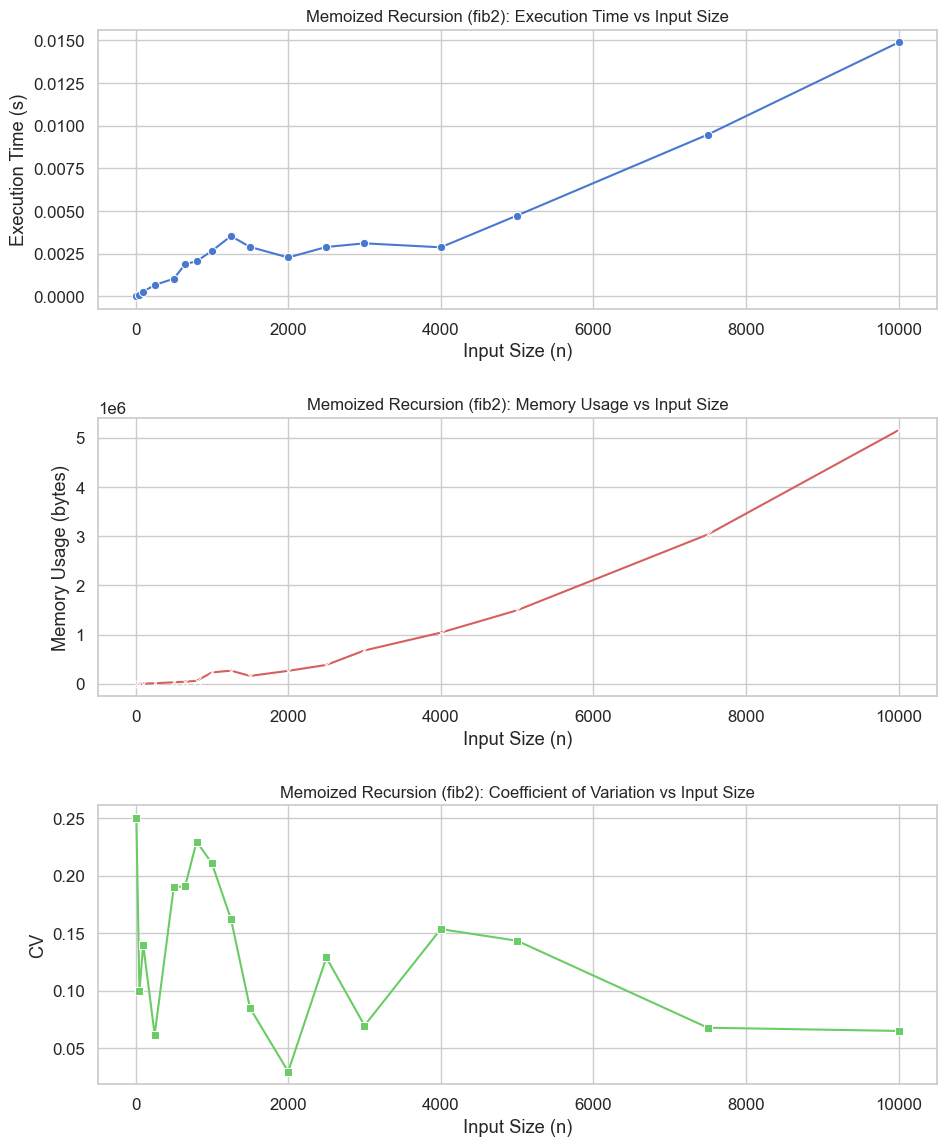

In [36]:
analyze_algorithm(fib2, 'Memoized Recursion (fib2)', input_sizes)

Algorithm 3: Iteration with Constant Storage

In [37]:
def fib3(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    
    f2, f1 = 1, 0
    for _ in range(2, n + 1):
        f2, f1 = f2 + f1, f2
        
    return f2


Analyzing Iteration with Constant Storage (fib3)...
Input Size |     Time (s) |  Memory (bytes) |       CV
----------------------------------------------------


Running experiments:  71%|███████   | 12/17 [00:00<00:00, 96.72it/s]

        10 |     0.000008 |              80 |   0.5223
        50 |     0.000030 |             140 |   0.5811
       100 |     0.000037 |             152 |   0.1167
       250 |     0.000088 |             188 |   0.1081
       500 |     0.000227 |             292 |   0.1849
       650 |     0.000688 |             328 |   1.3869
       800 |     0.000502 |             376 |   0.3029
      1000 |     0.000352 |             436 |   0.0714
      1250 |     0.000473 |             496 |   0.0542
      1500 |     0.000799 |           1,067 |   0.0964
      2000 |     0.000921 |             712 |   0.1108
      2500 |     0.001664 |             844 |   0.0476
      3000 |     0.002350 |             988 |   0.3174
      4000 |     0.002506 |           1,264 |   0.2302


Running experiments: 100%|██████████| 17/17 [00:00<00:00, 38.59it/s]

      5000 |     0.002384 |         149,546 |   0.0067
      7500 |     0.005817 |           2,236 |   0.2236
     10000 |     0.007591 |           2,932 |   0.0695


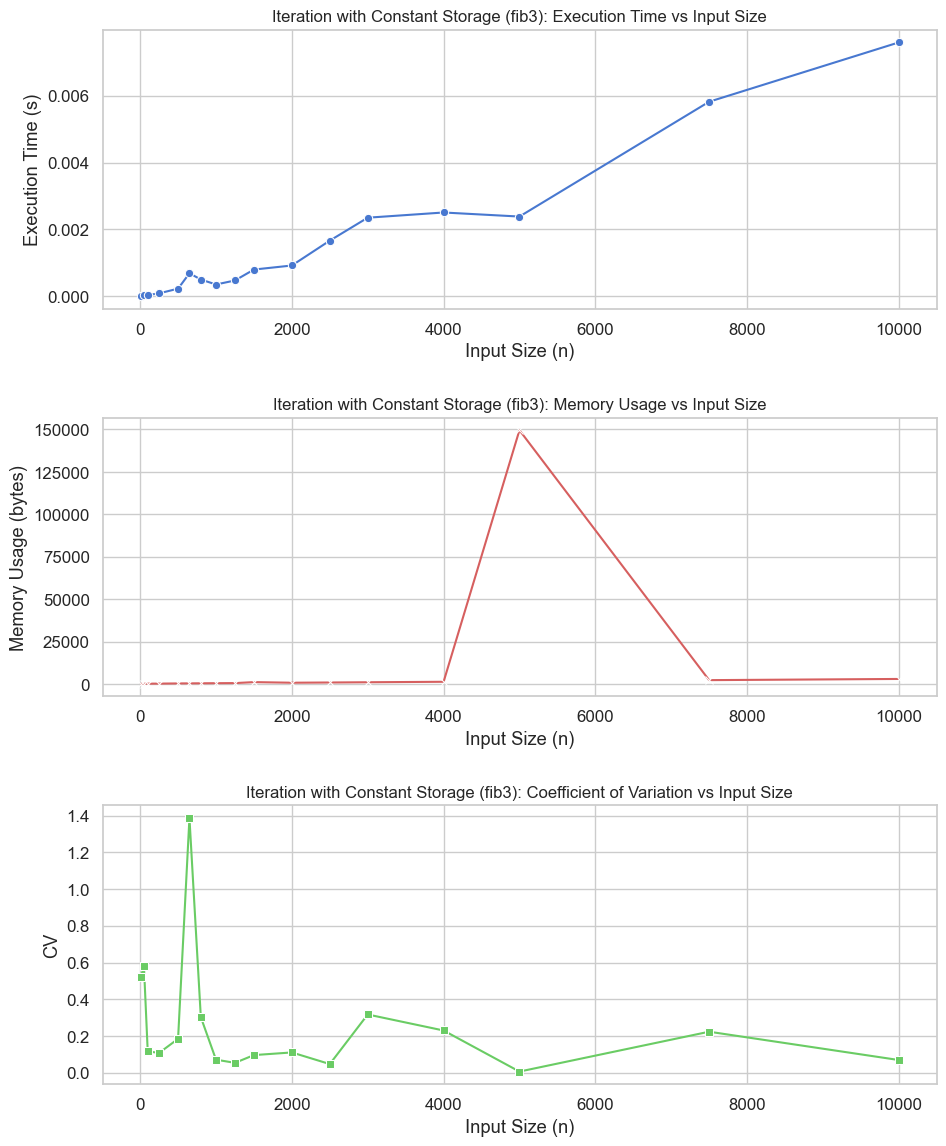

In [40]:
analyze_algorithm(fib3, 'Iteration with Constant Storage (fib3)', input_sizes)

Algorithm 4: Closed-form Formula with the Golden Ratio (Binet's Formula)

In [48]:
def fib4(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        sqrt_5 = math.sqrt(5)
        phi = (1 + sqrt_5) / 2
        
        phi_n = math.pow(phi, n)
        
        # instead of directly computing psi^n, thus reducing precision errors (floating-point precision issues)
        psi_n = float(1) / phi_n
        
        # adjusting psi_n for odd n
        if n % 2 == 1:
            psi_n = -psi_n
            
        # Binet's formula
        result = round((phi_n - psi_n) / sqrt_5)
        
        return result


Analyzing Binets Formula (fib4)...
Input Size |     Time (s) |  Memory (bytes) |       CV
----------------------------------------------------


Running experiments: 100%|██████████| 17/17 [00:00<00:00, 4077.96it/s]

        10 |     0.000003 |              72 |   1.1405
        50 |     0.000003 |             104 |   0.4603
       100 |     0.000002 |             108 |   0.6554
       250 |     0.000002 |             120 |   0.5751
       500 |     0.000002 |             144 |   0.6295
       650 |     0.000002 |             160 |   0.5327
       800 |     0.000002 |             172 |   0.5751
      1000 |     0.000002 |             192 |   0.5633
      1250 |     0.000006 |             212 |   1.2815
Error at input size 1500: math range error
Error at input size 2000: math range error
Error at input size 2500: math range error
Error at input size 3000: math range error
Error at input size 4000: math range error
Error at input size 5000: math range error
Error at input size 7500: math range error
Error at input size 10000: math range error


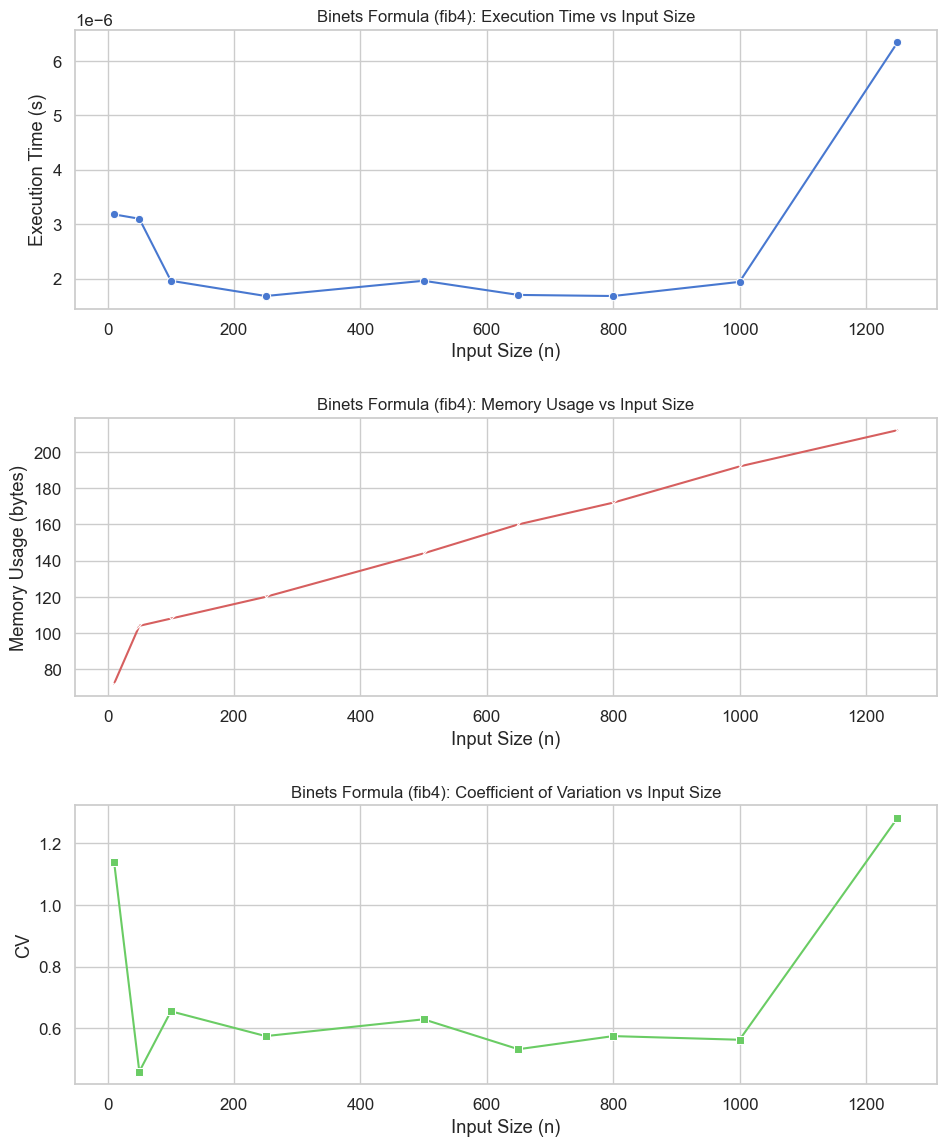

In [52]:
analyze_algorithm(fib4, 'Binets Formula (fib4)', input_sizes)

Algorithm 4.2: Closed-form Formula with the Golden Ratio and Rounding

In [53]:
def fib42(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        sqrt_5 = math.sqrt(5)
        phi = (1 + sqrt_5) / 2 

        phi_n = math.pow(phi, n)

        result = round(phi_n / sqrt_5)

        return result


Analyzing Binets Formula (fib42) with rounding...
Input Size |     Time (s) |  Memory (bytes) |       CV
----------------------------------------------------


Running experiments: 100%|██████████| 17/17 [00:00<00:00, 3028.25it/s]

        10 |     0.000006 |              72 |   1.1168
        50 |     0.000004 |             104 |   0.9764
       100 |     0.000003 |             108 |   0.8160
       250 |     0.000003 |             120 |   0.6666
       500 |     0.000003 |             144 |   0.7056
       650 |     0.000003 |             160 |   0.6497
       800 |     0.000003 |             172 |   0.6066
      1000 |     0.000003 |             192 |   0.5966
      1250 |     0.000003 |             212 |   0.6648
Error at input size 1500: math range error
Error at input size 2000: math range error
Error at input size 2500: math range error
Error at input size 3000: math range error
Error at input size 4000: math range error
Error at input size 5000: math range error
Error at input size 7500: math range error
Error at input size 10000: math range error


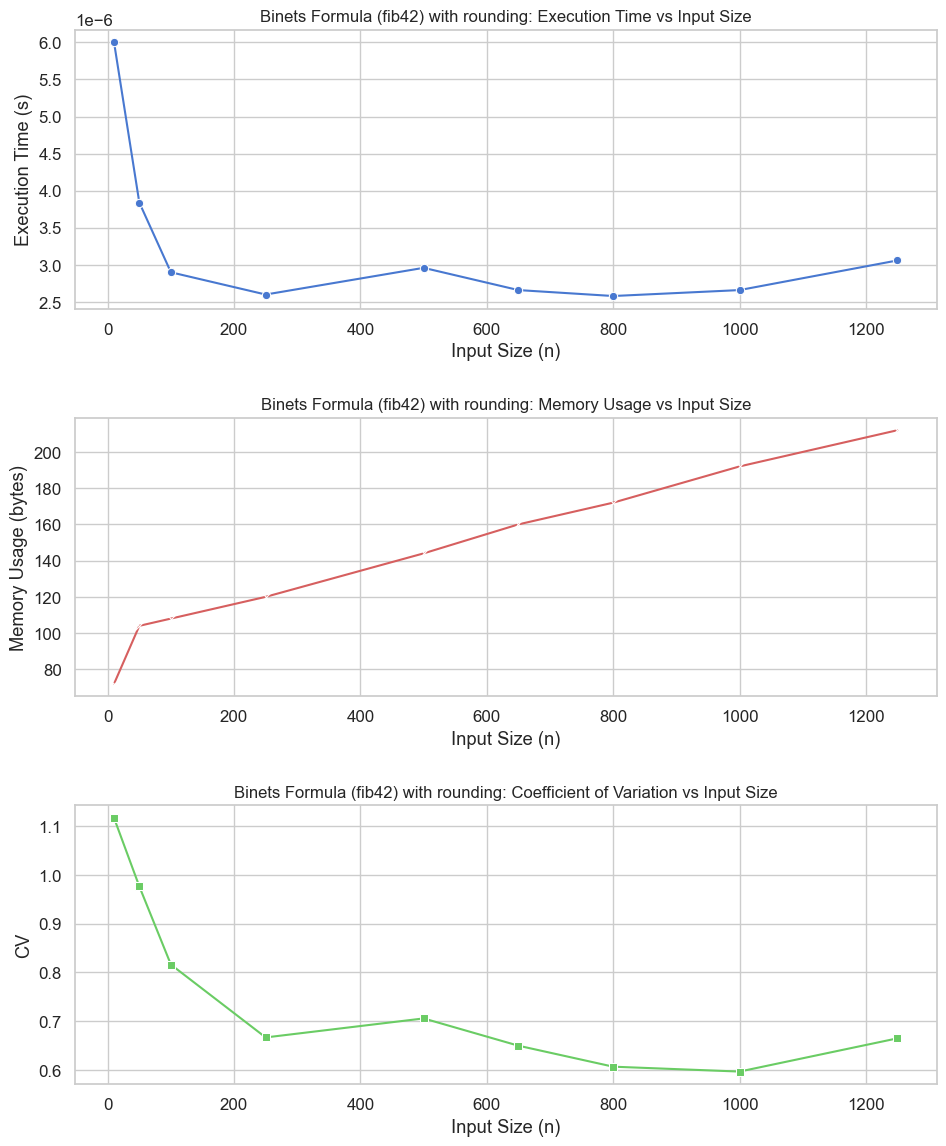

In [54]:
analyze_algorithm(fib42, 'Binets Formula (fib42) with rounding', input_sizes)

Algorithm 5: Matrix Exponentiation Iteration

In [55]:
def mat_mul_opt(m1):
    m = [[0, 0], [0, 0]]
    m[0][0] = m1[0][0] + m1[0][1] # Fibonacci transition step
    m[0][1] = m1[0][0] # Shift previous Fibonacci term
    m[1][0] = m1[1][0] + m1[1][1] # Fibonacci transition step
    m[1][1] = m1[1][0] # Shift previous Fibonacci term
    return m

In [56]:
def fib5(n):
    if n == 0:
        return 0
    
    m = [[1, 0], [0, 1]]
    for _ in range(1, n):
        m = mat_mul_opt(m)
    
    return m[0][0]


Analyzing Matrix Exponentiation Iteration (fib5)...
Input Size |     Time (s) |  Memory (bytes) |       CV
----------------------------------------------------


Running experiments:  71%|███████   | 12/17 [00:00<00:00, 111.89it/s]

        10 |     0.000011 |             128 |   0.3201
        50 |     0.000059 |             344 |   0.0475
       100 |     0.000105 |             368 |   0.1762
       250 |     0.000164 |             440 |   0.0868
       500 |     0.000345 |             616 |   0.0286
       650 |     0.000751 |             688 |   0.3411
       800 |     0.000682 |             784 |   0.1919
      1000 |     0.000911 |             904 |   0.1009
      1250 |     0.000882 |           1,024 |   0.1920
      1500 |     0.001041 |           1,168 |   0.1356
      2000 |     0.001342 |           1,456 |   0.0324
      2500 |     0.001847 |           1,720 |   0.1915
      3000 |     0.001596 |           2,008 |   0.1330
      4000 |     0.002230 |           2,560 |   0.1644
      5000 |     0.002857 |         151,135 |   0.2155


Running experiments: 100%|██████████| 17/17 [00:00<00:00, 48.93it/s] 

      7500 |     0.006648 |           4,504 |   0.2340
     10000 |     0.007765 |         153,560 |   0.0948


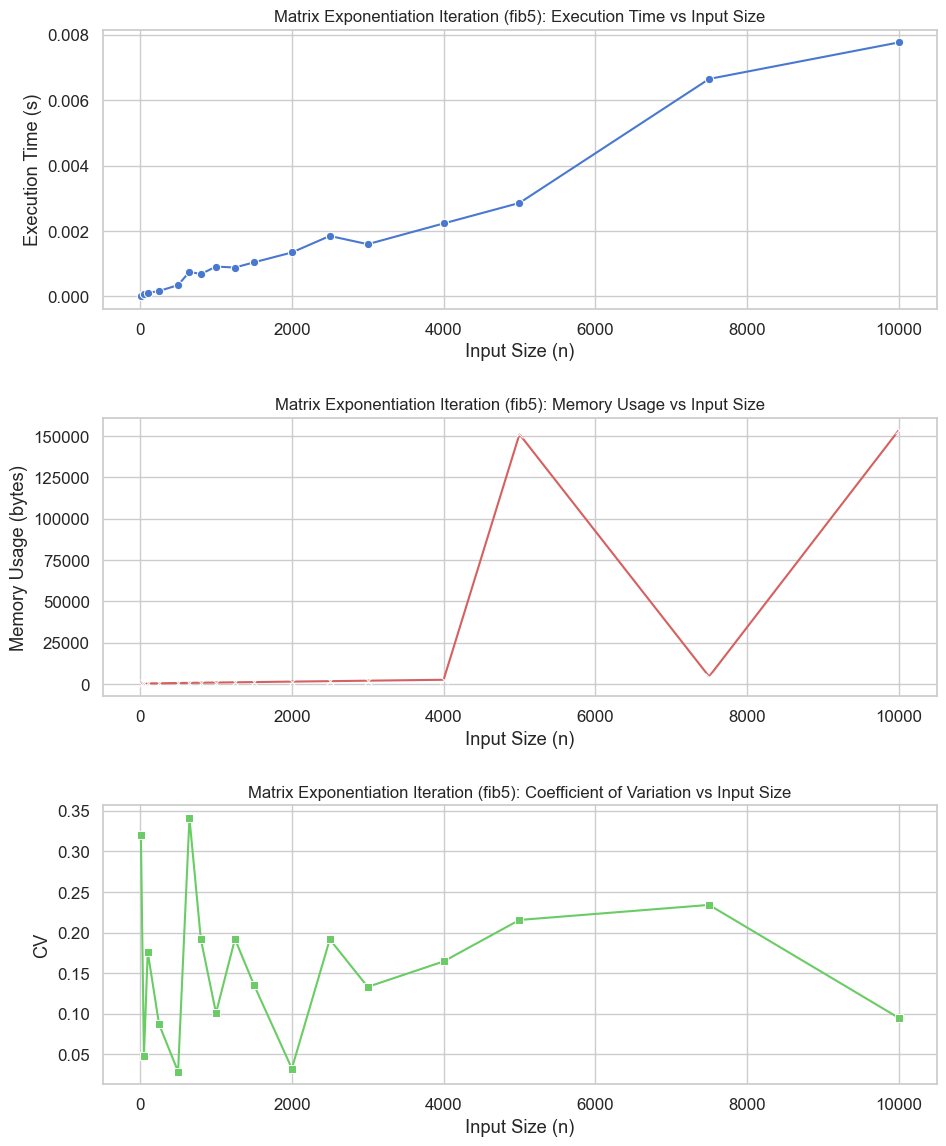

In [62]:
analyze_algorithm(fib5, 'Matrix Exponentiation Iteration (fib5)', input_sizes)

Algorithm 5.2: Matrix Exponentiation via Repeated Squaring (Recursive)

In [63]:
# multiply 2x2 matrices m1 and m2 and return the product.
def mat_mul(m1, m2):
    m = [[0, 0], [0, 0]]
    m[0][0] = m1[0][0] * m2[0][0] + m1[0][1] * m2[1][0]
    m[0][1] = m1[0][0] * m2[0][1] + m1[0][1] * m2[1][1]
    m[1][0] = m1[1][0] * m2[0][0] + m1[1][1] * m2[1][0]
    m[1][1] = m1[1][0] * m2[0][1] + m1[1][1] * m2[1][1]
    return m

In [64]:
def mat_pow_opt_recur(m, n):
    r = [[1, 0], [0, 1]]  # the identity matrix
    if n > 1:
        r = mat_pow_opt_recur(m, n >> 1)  # divide n by 2
        r = mat_mul(r, r)  # square the result
        if n % 2 == 1:  # if n is odd, multiply by m
            r = mat_mul(r, m)
    return r

In [65]:
def fib52(n):
    if n == 0:
        return 0
    else:
        m = mat_pow_opt_recur([[1, 1], [1, 0]], n - 1)
        return m[0][0]


Analyzing Matrix Exponentiation via Repeated Squaring (Recursive)...
Input Size |     Time (s) |  Memory (bytes) |       CV
----------------------------------------------------


Running experiments: 100%|██████████| 17/17 [00:00<00:00, 360.14it/s]

        10 |     0.000037 |             240 |   0.2543
        50 |     0.000053 |             432 |   0.3696
       100 |     0.000046 |             480 |   0.1625
       250 |     0.000069 |             560 |   0.1299
       500 |     0.000080 |             644 |   0.1673
       650 |     0.000064 |             640 |   0.1129
       800 |     0.000084 |             688 |   0.0866
      1000 |     0.000091 |             860 |   0.0923
      1250 |     0.000146 |             672 |   0.3017
      1500 |     0.000099 |             824 |   0.1040
      2000 |     0.000119 |           1,256 |   0.1169
      2500 |     0.000112 |             824 |   0.1406
      3000 |     0.000138 |           1,220 |   0.3484
      4000 |     0.000168 |           2,084 |   0.1136
      5000 |     0.000189 |           1,184 |   0.0986
      7500 |     0.000227 |           3,272 |   0.0899
     10000 |     0.000251 |           1,940 |   0.0704


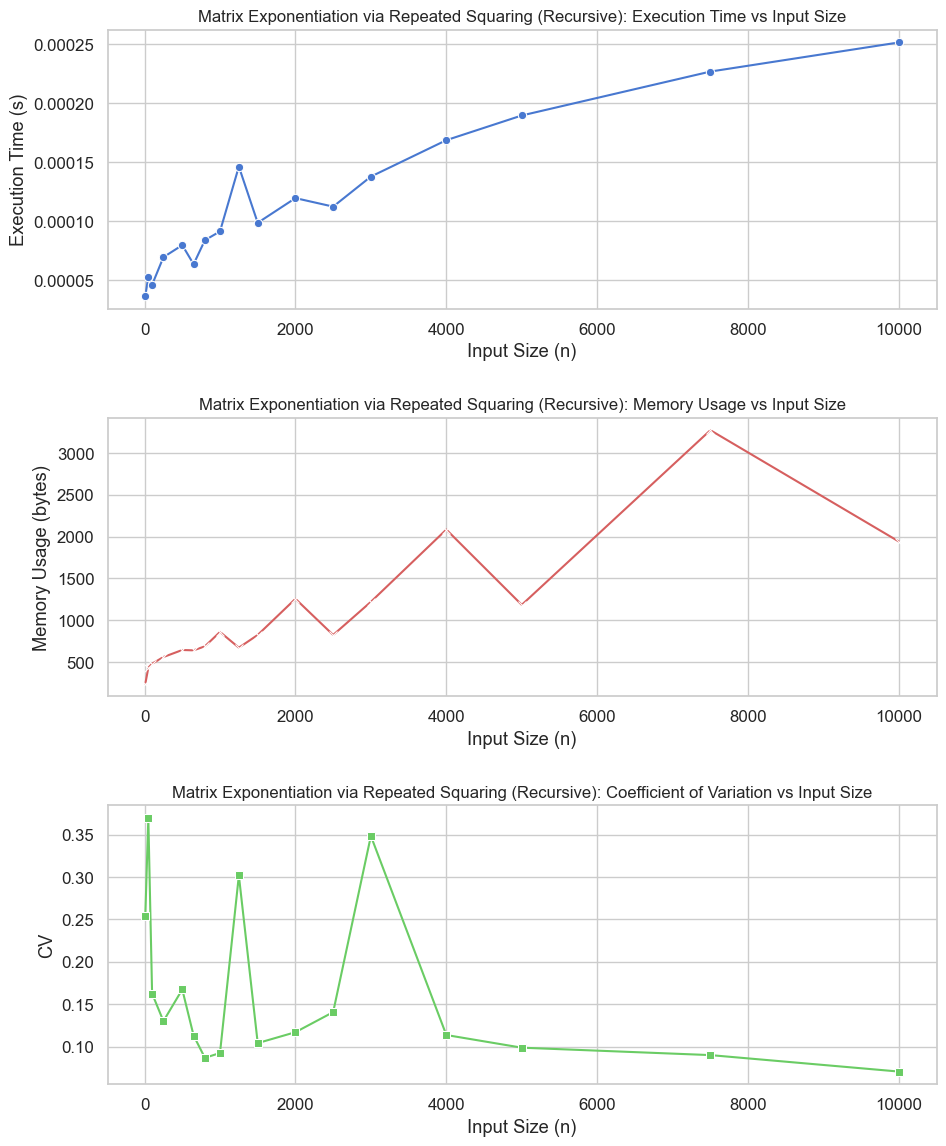

In [70]:
analyze_algorithm(fib52, 'Matrix Exponentiation via Repeated Squaring (Recursive)', input_sizes)

Algorithm 5.3: Matrix Exponentiation via Repeated Squaring - Iterative

In [72]:
def mat_pow_opt_iter(m, n):
    n_bits = bin(n)[2:]  # convert n to binary
    r = [[1, 0], [0, 1]]  # identity matrix
    for b in n_bits:
        r = mat_mul(r, r)  # square the result
        if b == '1':  # if the current bit is 1, multiply by m
            r = mat_mul(r, m)
    return r

In [73]:
def fib53(n):
    if n == 0:
        return 0
    else:
        m = mat_pow_opt_iter([[1, 1], [1, 0]], n - 1)
        return m[0][0]


Analyzing Matrix Exponentiation via Repeated Squaring - Iterative (fib53)...
Input Size |     Time (s) |  Memory (bytes) |       CV
----------------------------------------------------


Running experiments: 100%|██████████| 17/17 [00:00<00:00, 251.79it/s]

        10 |     0.000042 |             237 |   0.4365
        50 |     0.000046 |             575 |   0.2581
       100 |     0.000053 |             624 |   0.1553
       250 |     0.000071 |             709 |   0.1564
       500 |     0.000110 |             958 |   0.1865
       650 |     0.000080 |           1,067 |   0.1114
       800 |     0.000098 |           1,211 |   0.1136
      1000 |     0.000168 |           1,391 |   0.0322
      1250 |     0.000139 |           1,572 |   0.1299
      1500 |     0.000152 |           1,788 |   0.2144
      2000 |     0.000156 |           2,220 |   0.1026
      2500 |     0.000280 |           2,617 |   0.2584
      3000 |     0.000227 |           3,049 |   0.1527
      4000 |     0.000405 |           3,877 |   0.0493
      5000 |     0.000495 |           4,706 |   0.0375
      7500 |     0.000559 |           6,794 |   0.0908
     10000 |     0.000802 |           8,883 |   0.0273


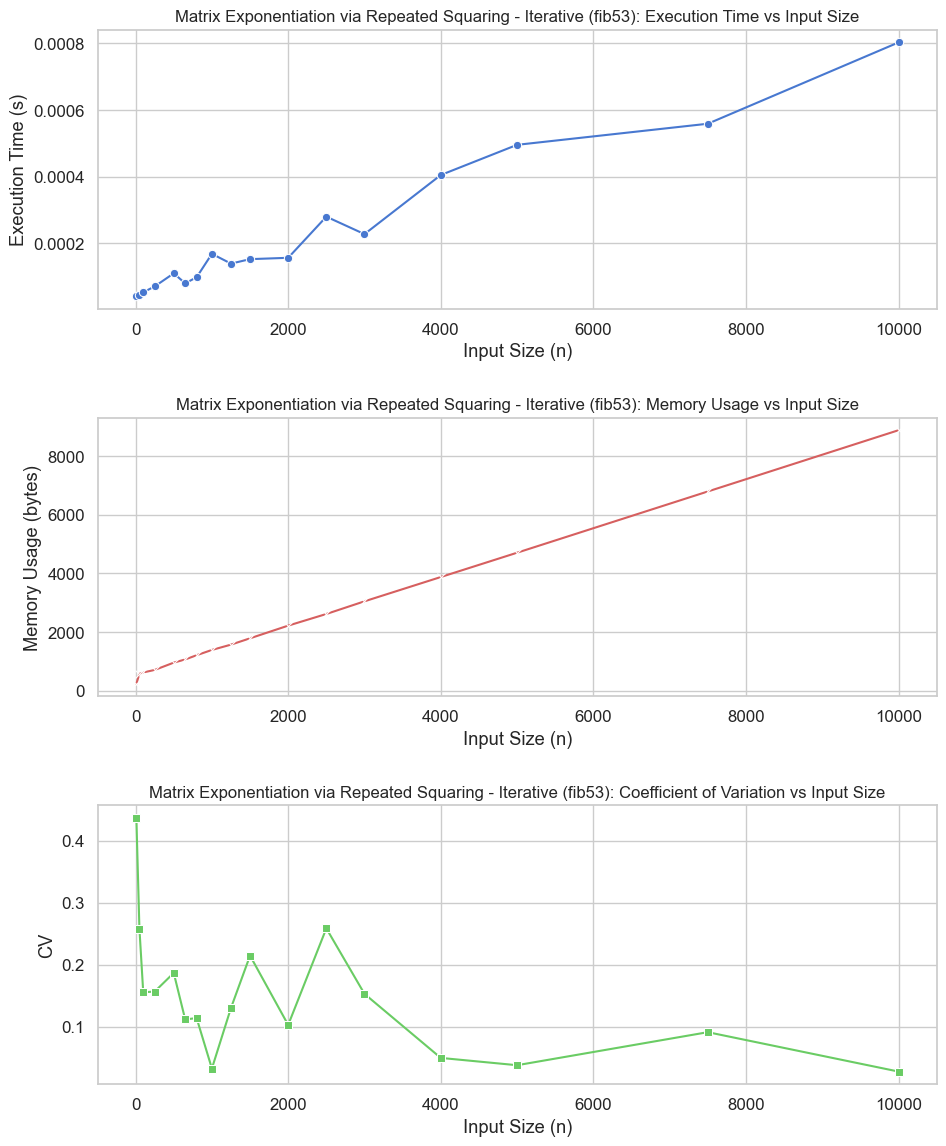

In [77]:
analyze_algorithm(fib53, 'Matrix Exponentiation via Repeated Squaring - Iterative (fib53)', input_sizes)

Algorithm 6: Memoization and Fast Doubling

In [78]:
def fib6(n):
    if n < 0:
        raise ValueError("Negative Fibonacci numbers are not supported")

    F = {}

    # Queue for tracking necessary Fibonacci indices
    qinx = []
    qinx.append(n)
    F[n] = -1  # Mark value for computation

    # Find all required indices using fast doubling
    while qinx:
        k = qinx.pop() >> 1  # Integer division by 2
        if k not in F:
            F[k] = -1
            qinx.append(k)
        if (k + 1) not in F:
            F[k + 1] = -1
            qinx.append(k + 1)

    # Base cases
    F[0], F[1], F[2] = 0, 1, 1

    # Compute Fibonacci using fast doubling
    keys_sorted = sorted(F.keys())  # Get sorted required keys
    for k in keys_sorted[3:]:
        k2 = k >> 1
        f1, f2 = F[k2], F[k2 + 1]
        if k % 2 == 0:
            F[k] = 2 * f2 * f1 - f1 * f1
        else:
            F[k] = f2 * f2 + f1 * f1

    return F[n]


Analyzing Memoization and Fast Doubling...
Input Size |     Time (s) |  Memory (bytes) |       CV
----------------------------------------------------


Running experiments: 100%|██████████| 17/17 [00:00<00:00, 417.62it/s]

        10 |     0.000029 |             480 |   0.6884
        50 |     0.000038 |           1,032 |   0.3492
       100 |     0.000042 |           1,152 |   0.2606
       250 |     0.000054 |           1,448 |   0.1915
       500 |     0.000064 |           2,188 |   0.2231
       650 |     0.000074 |           2,440 |   0.1807
       800 |     0.000066 |           2,372 |   0.2083
      1000 |     0.000076 |           2,608 |   0.1969
      1250 |     0.000136 |           2,956 |   0.0706
      1500 |     0.000116 |           3,008 |   0.3076
      2000 |     0.000093 |           3,232 |   0.1793
      2500 |     0.000131 |           3,676 |   0.1863
      3000 |     0.000135 |           3,848 |   0.2877
      4000 |     0.000131 |           4,308 |   0.1654
      5000 |     0.000159 |           4,984 |   0.1309
      7500 |     0.000358 |           6,940 |   0.1230
     10000 |     0.000313 |           8,040 |   0.2130


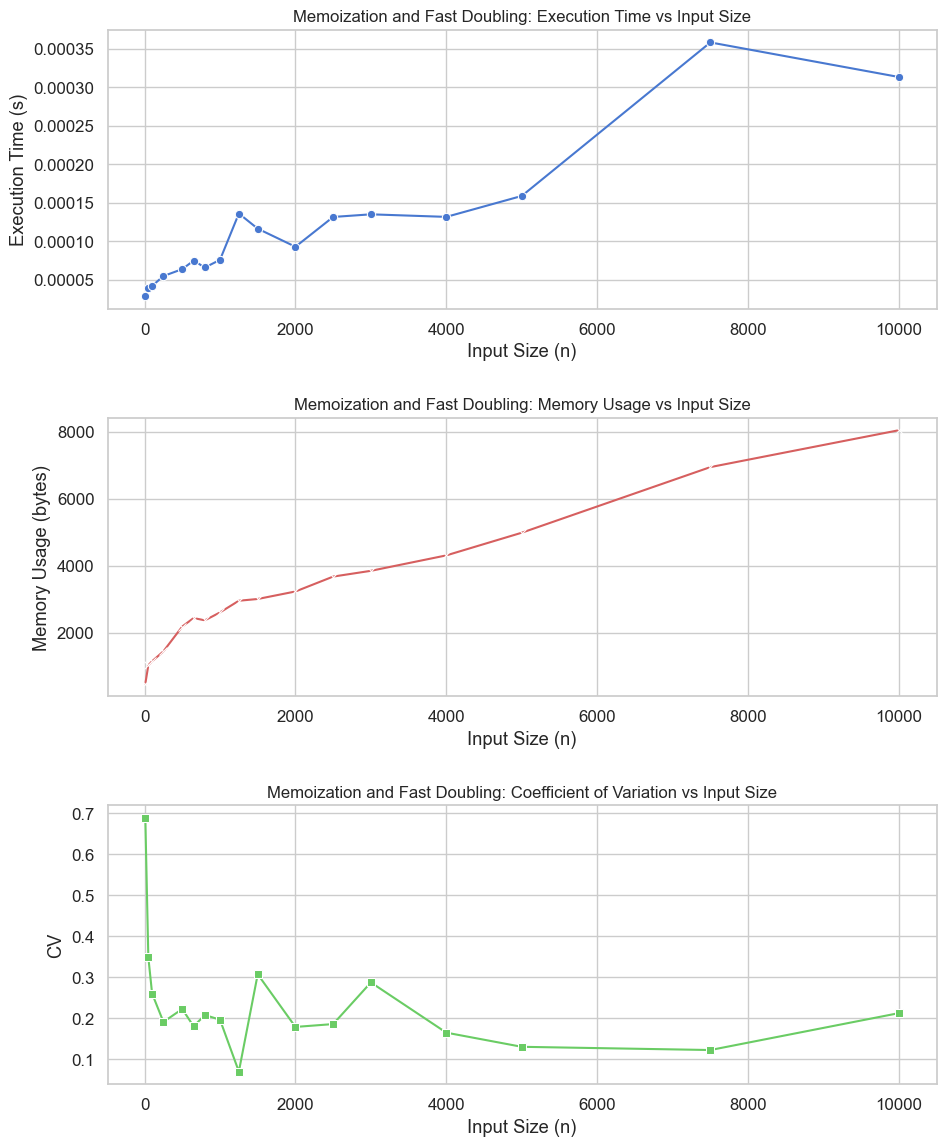

In [79]:
analyze_algorithm(fib6, 'Memoization and Fast Doubling', input_sizes)